# Econmic Model 2: Predict Retail with Year amd ICO Composite
## Random Forest Decision Tree
This model employs a Random Forest Regressor Decision Tree algorithm to predict retail coffe price bassed on economic metrics such as  supply, trade, inventories, consumption, energy costs, and commodity pricing data. Data was obtained from International Coffee Organization (The ICO Historic Data).

### Goal
- Train model with Time and ICO spot price to predict retail price
- Can be used for web applicaiton
- User input: Year + ICO Spot = Retial price (for year)
Example
 
 Enter:        2021 (Year) 
 
 Enter:       1.09 (ICO composite (USD $/lb))
 
 Output:      Average Global Retail price (USD $/lb)


### Scoring Metrics:
- Training Data Score: 0.9597823614739235
- Testing Data Score: 0.8959434042614792
- MSE:  0.12347079250000448
- RMSE:  0.06173539625000224

In [1]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import os
import matplotlib.pyplot as plt

In [2]:
# Machine learning libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# import processed data
path = "Trends/"
file = "finalFeatures.csv"
path_file = path + file
df = pd.read_csv(path_file)
df

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20,4.59
5,1995,17.02,74253,95216,87318,22603,1.38,7905,11539,18.43,6.03
6,1996,20.64,81884,103284,103306,23513,1.02,6494,12485,22.12,5.68
7,1997,19.11,77962,108001,99861,24271,1.34,6896,14136,20.61,5.35
8,1998,12.76,82872,109718,108892,25117,1.09,6601,15135,14.42,5.31
9,1999,17.90,92405,116301,131385,25741,0.86,8601,15331,19.35,4.83


In [4]:
df.shape

(29, 11)

In [5]:
two_features_df = df.drop(columns= ['Coffe Imports (In 1K 60-kg bags) Calendar Year 137c',
                                         're-exports (In 1K 60-kg bags) Calendar Year 35c',
                                         'Inventories (In 1K 60-kg bags)',
                                         'Coffe Export (In 1K 60-kg bags) crop year',
                                         'Coffe Produciton (In 1K 60-kg bags) crop year',
                                        'Brent ave closing USD',
                                         'Domestic Consumption (In 1K 60-kg bags)',
                                         'Brent ave closing USD',
                                         'WTI ave closing price USD'])

In [6]:
two_features_df.head()

,Year,ICO composite (USD $/lb),retail
0,1990,0.72,4.53
1,1991,0.67,4.48
2,1992,0.53,4.53
3,1993,0.62,4.03
4,1994,1.34,4.59


In [7]:
Years = df["Year"]
# needed for ploting final graph
# Years

In [8]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

x = two_features_df.drop("retail", axis=1)
y = two_features_df["retail"]
target = y
data_df = x
print(x.shape)
print(y.shape)

(29, 2)
(29,)


### RandomForestRegressor

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [10]:
#from sklearn.ensemble import RandomForestRegressor
Econ_model_twoFeatures = RandomForestRegressor(n_estimators=200)
Econ_model_twoFeatures = Econ_model_twoFeatures.fit(X_train, y_train)
Econ_model_twoFeatures.score(X_test, y_test)

0.8523816259265417

In [11]:
print('Test Acc: %.3f' % Econ_model_twoFeatures.score(X_test, y_test))

Test Acc: 0.852


In [12]:
print(f"Training Data Score: {Econ_model_twoFeatures.score(X_train, y_train)}")
print(f"Testing Data Score: {Econ_model_twoFeatures.score(X_test, y_test)}")

Training Data Score: 0.9468271822243612
Testing Data Score: 0.8523816259265417


In [13]:
#sorted(zip(Econ_model_twoFeatures.feature_importances_, feature_names), reverse=True)

In [14]:
# Model stats and needed for ploting first graph

In [15]:
ypred = Econ_model_twoFeatures.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

# Taken from refrence
# Target MSE:  0.130713987032462
# Target RMSE:  0.065356993516231 

MSE:  0.17516004156250436
RMSE:  0.08758002078125218


In [16]:
print(f"train set shape: {y_test.shape}")
print(f"Test set shape:  {ypred.shape}")

train set shape: (8,)
Test set shape:  (8,)


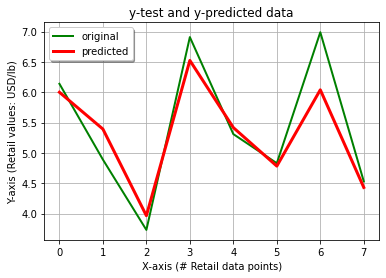

In [17]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", color ="green")
plt.plot(x_ax, ypred, linewidth=3.0, label="predicted", color = "red")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis (# Retail data points)')
plt.ylabel('Y-axis (Retail values: USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [18]:
 # save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'z2_Economic_web_model_2_inputs.sav'
joblib.dump(Econ_model_twoFeatures, filename)

['z2_Economic_web_model_2_inputs.sav']

In [19]:
# Set up for desired graph

In [20]:
y_pred_bs = Econ_model_twoFeatures.predict(data_df)

In [21]:
data_df.head(1)

,Year,ICO composite (USD $/lb)
0,1990,0.72


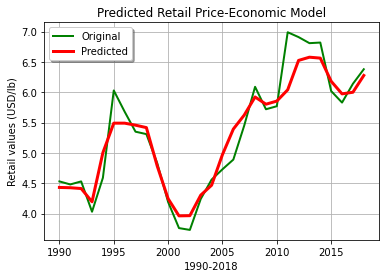

In [22]:
x_ax = Years
plt.plot(x_ax, target, linewidth=2, label="Original", color ="green")
plt.plot(x_ax, y_pred_bs, linewidth=3.0, label="Predicted", color = "red")
plt.title("Predicted Retail Price-Economic Model")
plt.xlabel('1990-2018')
plt.ylabel('Retail values (USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('Econimic_model.png')
plt.show() 

In [23]:
print(f"Training Data Score: {Econ_model_twoFeatures.score(X_train, y_train).round(decimals=4)}")
print(f"Testing Data Score: {Econ_model_twoFeatures.score(X_test, y_test).round(decimals=4)}")

Training Data Score: 0.9468
Testing Data Score: 0.8524


# web model development

In [24]:
two_features_df.head(10)

,Year,ICO composite (USD $/lb),retail
0,1990,0.72,4.53
1,1991,0.67,4.48
2,1992,0.53,4.53
3,1993,0.62,4.03
4,1994,1.34,4.59
5,1995,1.38,6.03
6,1996,1.02,5.68
7,1997,1.34,5.35
8,1998,1.09,5.31
9,1999,0.86,4.83


In [25]:
input_test_1 = two_features_df.head(1)
User_Test_df = (input_test_1).drop("retail", axis=1)
input_test_1

,Year,ICO composite (USD $/lb),retail
0,1990,0.72,4.53


In [26]:
#User_Test = (1990, 0.72)
#User_Test_df

In [31]:
#print(User_Test_df.dtypes)
test_model_data = [1999, 0.86]
test_model_data

[1999, 0.86]

In [32]:
user_test_data = np.array([[test_model_data]])

In [33]:
test_outpout = Econ_model_twoFeatures.predict(User_Test_df)

In [34]:
print(f"Input for Year and ICO spot: {test_model_data}")
print(f"Predicted Retail Price: {test_outpout} USD/LB")

Input for Year and ICO spot: [1999, 0.86]
Predicted Retail Price: [4.4305] USD/LB
